# **E-Commerce Credit Fraud Detection**


# Data import and package management

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import auc, roc_curve,  plot_precision_recall_curve, precision_recall_curve
from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/WIH2001 Data Analytics/Case study/creditcard.csv')

# Exploratory Data Analysis and Data Preprocessing

Features names are anonymous for privacy purposes.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Check for null values. Remove if there's any.

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Check the distribution of classes.

In [ ]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


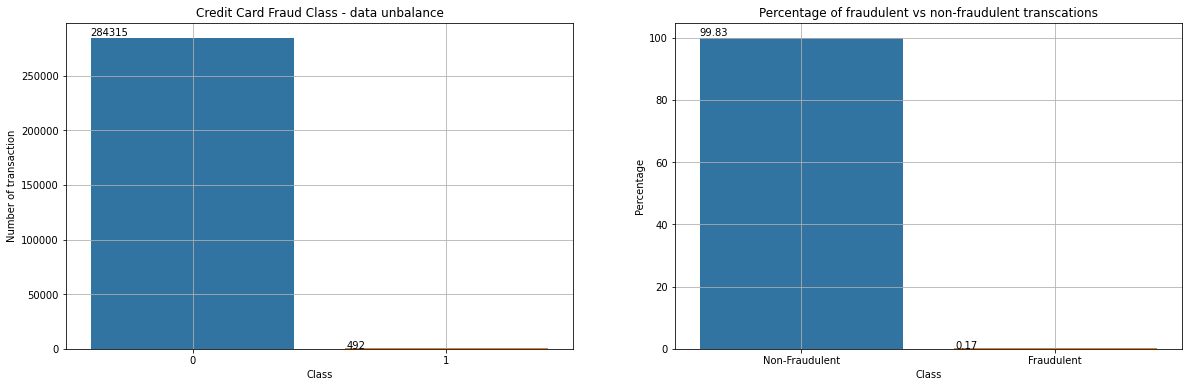

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
ax=sns.countplot(df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.grid()
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
ax=sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()

The data is highly imbalanced.

## Check for duplicates and remove if there's any.

In [ ]:
print(df.shape)
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)

(284807, 31)
(283726, 31)


## Feature Engineering

Dropping **Time** column as this feature is not going to help in the model building.

In [ ]:
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Feature Scaling

As PCA is already performed on the dataset from V1 to V28 features, we are scaling only **Amount** field.

In [ ]:
sc = RobustScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0


## Separating data into features and label: X and y.

In [ ]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 324)
print("Number instances in X_train dataset: ", X_train.shape)
print("Number instances in y_train dataset: ", y_train.shape)
print("Number instances in X_test dataset: ", X_test.shape)
print("Number instances in y_test dataset: ", y_test.shape)

Number instances in X_train dataset:  (198608, 29)
Number instances in y_train dataset:  (198608,)
Number instances in X_test dataset:  (85118, 29)
Number instances in y_test dataset:  (85118,)


As shown in previous steps, the data is heavily imbalanced, so we will perform oversampling using SMOTE.

## SMOTE Oversampling

Before OverSampling, the shape of features_X: (198608, 29)
Before OverSampling, the shape of op_y: (198608,) 

Before OverSampling, counts of Non-fraudulence Class '0': 198266
Before OverSampling, counts of Fraudulence Class '1': 342


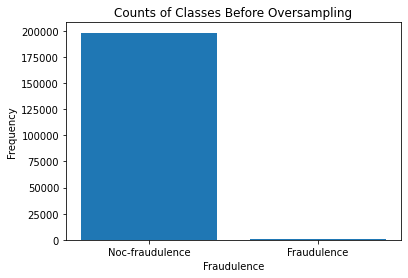

In [ ]:
fig, ax = plt.subplots() 
x = (int(sum(y_train==0)))
y = (int(sum(y_train==1)))

data = [x,y]
event = ['Noc-fraudulence','Fraudulence']
ax.bar(event, data) 
ax.set_title('Counts of Classes Before Oversampling') 
ax.set_xlabel('Fraudulence') 
ax.set_ylabel('Frequency')

print('Before OverSampling, the shape of features_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of op_y: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of Non-fraudulence Class '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of Fraudulence Class '1': {}".format(sum(y_train==1)))

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before OverSampling, the shape of features_X: (396532, 29)
Before OverSampling, the shape of op_y: (396532,) 

Before OverSampling, counts of Non-fraudulence Class '0': 198266
Before OverSampling, counts of Fraudulence Class '1': 198266


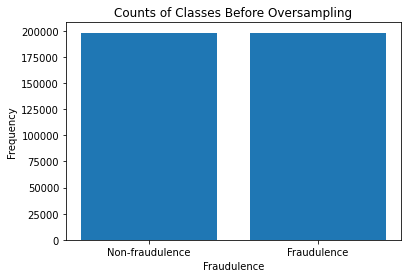

In [ ]:
fig, ax = plt.subplots() 
x = (int(sum(y_train_res==0)))
y = (int(sum(y_train_res==1)))

data = [x,y]
event = ['Non-fraudulence','Fraudulence']
ax.bar(event, data) 
ax.set_title('Counts of Classes Before Oversampling') 
ax.set_xlabel('Fraudulence') 
ax.set_ylabel('Frequency')

print('Before OverSampling, the shape of features_X: {}'.format(X_train_res.shape))
print('Before OverSampling, the shape of op_y: {} \n'.format(y_train_res.shape))

print("Before OverSampling, counts of Non-fraudulence Class '0': {}".format(sum(y_train_res==0)))
print("Before OverSampling, counts of Fraudulence Class '1': {}".format(sum(y_train_res==1)))

The data is balanced now.

# Models Building and Data Evaluation

## Random Forest

### Classification report

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_res, y_train_res)
RFPredictions = RF_classifier.predict(X_test)

print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = RFPredictions))
print('Precision score:',precision_score(y_test, RFPredictions))
print('Recall score:',recall_score(y_test, RFPredictions))
print('F1 score:',f1_score(y_test, RFPredictions))
print('\nClassification report: \n', classification_report(y_true = y_test, y_pred = RFPredictions))

Accuracy score:  0.999530064146244
Precision score: 0.8888888888888888
Recall score: 0.7938931297709924
F1 score: 0.8387096774193549

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.89      0.79      0.84       131

    accuracy                           1.00     85118
   macro avg       0.94      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



### Confusion matrix

Confusion matrix: 


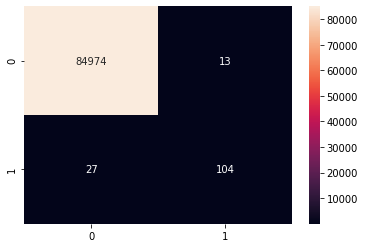

In [ ]:
print('Confusion matrix: ')
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = RFPredictions), annot=True,fmt='d')

### Precision Recall Curve

Area Under the Precision-Recall Curve (AUPRC): 0.8400105727595325


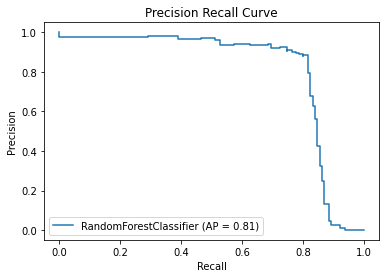

In [ ]:
fpr, tpr, thresholds = precision_recall_curve(y_test, RFPredictions, pos_label=1)

print('Area Under the Precision-Recall Curve (AUPRC):',auc(fpr, tpr))

plot_precision_recall_curve(RF_classifier, X_test,y_test, response_method='predict_proba')
plt.title('Precision Recall Curve');

## K-Nearest Neighbours

###Classification report

In [ ]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train_res, y_train_res)
KNNPredictions = KNN_classifier.predict(X_test)

print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = KNNPredictions))
print('Precision score:',precision_score(y_test, KNNPredictions))
print('Recall score:',recall_score(y_test, KNNPredictions))
print('F1 score:',f1_score(y_test, KNNPredictions))
print('\nClassification report: \n', classification_report(y_true = y_test, y_pred = KNNPredictions))

Accuracy score:  0.9976033271458445
Precision score: 0.376271186440678
Recall score: 0.8473282442748091
F1 score: 0.5211267605633803

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.38      0.85      0.52       131

    accuracy                           1.00     85118
   macro avg       0.69      0.92      0.76     85118
weighted avg       1.00      1.00      1.00     85118



### Confusion matrix

Confusion matrix: 


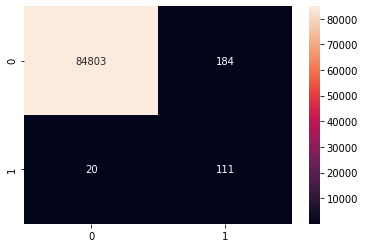

In [ ]:
print('Confusion matrix: ')
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = KNNPredictions), annot=True,fmt='d')

### Precision Recall Curve

Area Under the Precision-Recall Curve (AUPRC): 0.6103781594001318


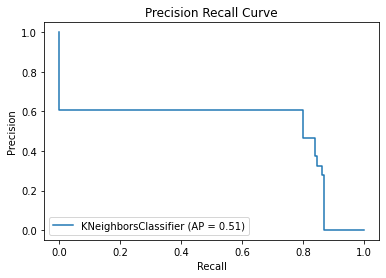

In [ ]:
fpr, tpr, thresholds = precision_recall_curve(y_test, KNNPredictions, pos_label=1)

print('Area Under the Precision-Recall Curve (AUPRC):',auc(fpr, tpr))

plot_precision_recall_curve(KNN_classifier, X_test,y_test, response_method='predict_proba')
plt.title('Precision Recall Curve');

## Decision Tree

### Classification report

In [ ]:
DT_classifier = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3)
DT_classifier.fit(X_train_res, y_train_res)
DTPredictions = DT_classifier.predict(X_test)

print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = DTPredictions))
print('Precision score:',precision_score(y_test, DTPredictions))
print('Recall score:',recall_score(y_test, DTPredictions))
print('F1 score:',f1_score(y_test, DTPredictions))
print('\nClassification report: \n', classification_report(y_true = y_test, y_pred = DTPredictions))

Accuracy score:  0.9975915787495007
Precision score: 0.36594202898550726
Recall score: 0.7709923664122137
F1 score: 0.49631449631449637

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.37      0.77      0.50       131

    accuracy                           1.00     85118
   macro avg       0.68      0.88      0.75     85118
weighted avg       1.00      1.00      1.00     85118



### Confusion matrix

Confusion matrix: 


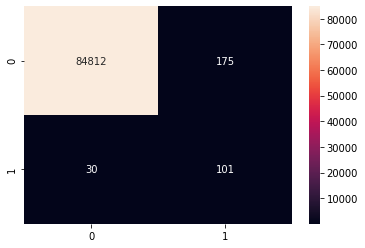

In [ ]:
print('Confusion matrix: ')
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = DTPredictions), annot=True, fmt='d')

### Precision Recall Curve

Area Under the Precision-Recall Curve (AUPRC): 0.5671043837229681


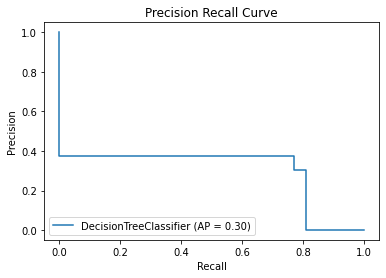

In [ ]:
fpr, tpr, thresholds = precision_recall_curve(y_test, DTPredictions, pos_label=1)

print('Area Under the Precision-Recall Curve (AUPRC):',auc(fpr, tpr))

plot_precision_recall_curve(DT_classifier, X_test,y_test, response_method='predict_proba')
plt.title('Precision Recall Curve');

## Logistic Regression

### Classification report

In [ ]:
LG_classifier = LogisticRegression(max_iter=1000)
LG_classifier.fit(X_train_res, y_train_res)
LGPredictions = LG_classifier.predict(X_test)

print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = LGPredictions))
print('Precision score:',precision_score(y_test, LGPredictions))
print('Recall score:',recall_score(y_test, LGPredictions))
print('F1 score:',f1_score(y_test, LGPredictions))
print('\nClassification report: \n', classification_report(y_true = y_test, y_pred = LGPredictions))

Accuracy score:  0.9741300312507343
Precision score: 0.05036908380373426
Recall score: 0.8854961832061069
F1 score: 0.09531635168447002

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     84987
           1       0.05      0.89      0.10       131

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.99     85118



### Confusion matrix

Confusion matrix: 


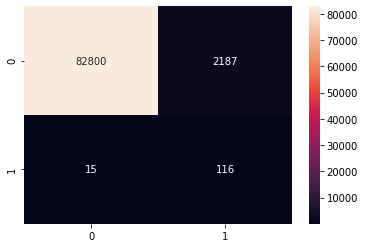

In [ ]:
print('Confusion matrix: ')
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = LGPredictions), annot=True,fmt='d')

### Precision Recall Curve

Area Under the Precision-Recall Curve (AUPRC): 0.46648170655644905


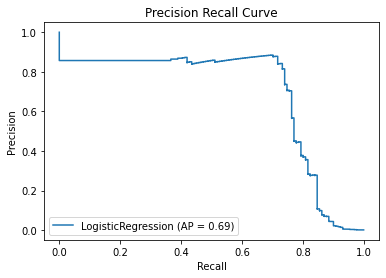

In [ ]:
fpr, tpr, thresholds = precision_recall_curve(y_test, LGPredictions, pos_label=1)

print('Area Under the Precision-Recall Curve (AUPRC):',auc(fpr, tpr))

plot_precision_recall_curve(LG_classifier, X_test, y_test, response_method='predict_proba')
plt.title('Precision Recall Curve');

## Linear SVC

### Classification report

In [ ]:
SVC_classifier = LinearSVC()
SVC_classifier.fit(X_train_res, y_train_res)
SVCPredictions = SVC_classifier.predict(X_test)

print('Accuracy score: ', accuracy_score(y_true = y_test, y_pred = SVCPredictions))
print('Precision score:',precision_score(y_test, SVCPredictions))
print('Recall score:',recall_score(y_test, SVCPredictions))
print('F1 score:',f1_score(y_test, SVCPredictions))
print('\nClassification report: \n', classification_report(y_true = y_test, y_pred = SVCPredictions))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy score:  0.9796987711177424
Precision score: 0.061504667764964306
Recall score: 0.8549618320610687
F1 score: 0.11475409836065573

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84987
           1       0.06      0.85      0.11       131

    accuracy                           0.98     85118
   macro avg       0.53      0.92      0.55     85118
weighted avg       1.00      0.98      0.99     85118



### Confusion matrix

Confusion matrix: 


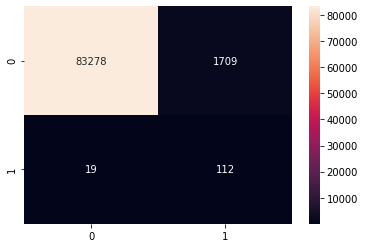

In [ ]:
print('Confusion matrix: ')
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = SVCPredictions), annot=True,fmt='d')

### Precision Recall Curve

Area Under the Precision-Recall Curve (AUPRC): 0.4568058197572327


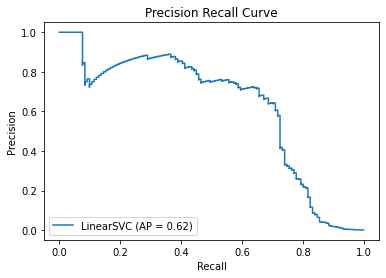

In [ ]:
fpr, tpr, thresholds = precision_recall_curve(y_test, SVCPredictions, pos_label=1)

print('Area Under the Precision-Recall Curve (AUPRC):',auc(fpr, tpr))

plot_precision_recall_curve(SVC_classifier, X_test,y_test)
plt.title('Precision Recall Curve');